<a href="https://colab.research.google.com/github/Sayed-Ali-Raza-Naqvi/DEP_House_Price_prediction_Project/blob/main/DEP_House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [440]:
df = pd.read_csv('housing.csv')
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3488,-118.57,34.29,4.00,6995.00,1151.00,2907.00,1089.00,7.08,341200.00,<1H OCEAN
4555,-118.24,34.06,19.00,2870.00,1021.00,3325.00,978.00,1.74,162500.00,<1H OCEAN
15611,-116.89,32.67,9.00,2652.00,393.00,1355.00,362.00,6.26,293100.00,<1H OCEAN
15202,-117.08,32.91,16.00,1653.00,228.00,690.00,224.00,6.59,248400.00,<1H OCEAN
4288,-118.30,34.09,40.00,3058.00,1215.00,3953.00,1223.00,1.82,218800.00,<1H OCEAN


In [441]:
df.shape

(20640, 10)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [443]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [444]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [445]:
df.dropna(inplace=True)

In [446]:
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]
df['median_house_value'] = np.log(df['median_house_value'])

x = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

<ipython-input-446-af5fe3d6dc6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_house_value'] = np.log(df['median_house_value'])


In [447]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [448]:
training_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

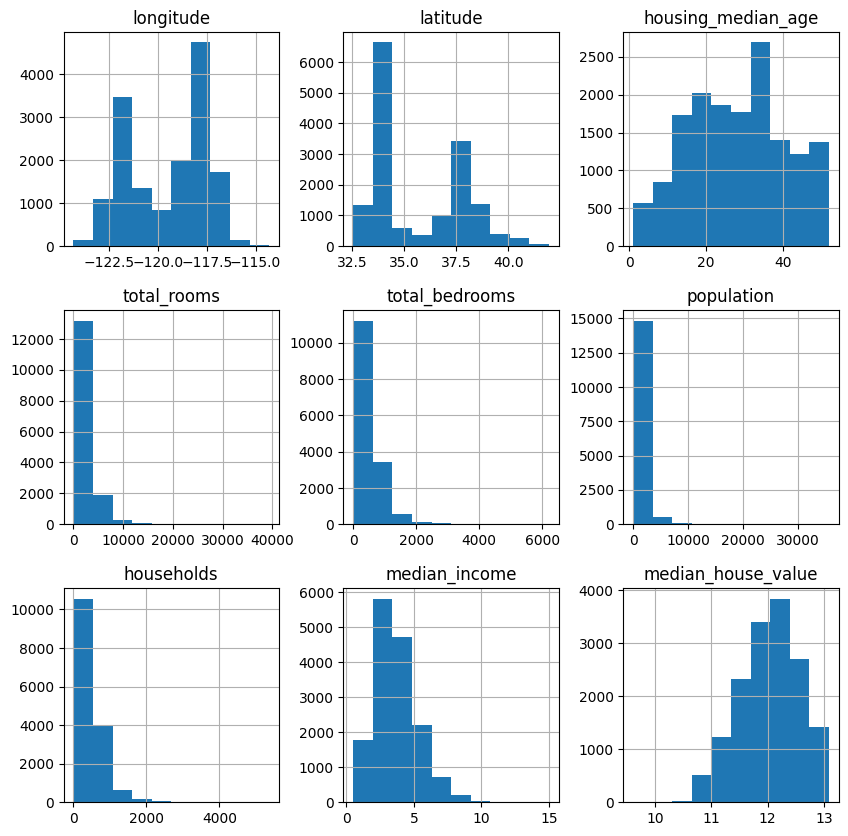

In [449]:
training_data.hist(figsize=(10,10))

<Axes: >

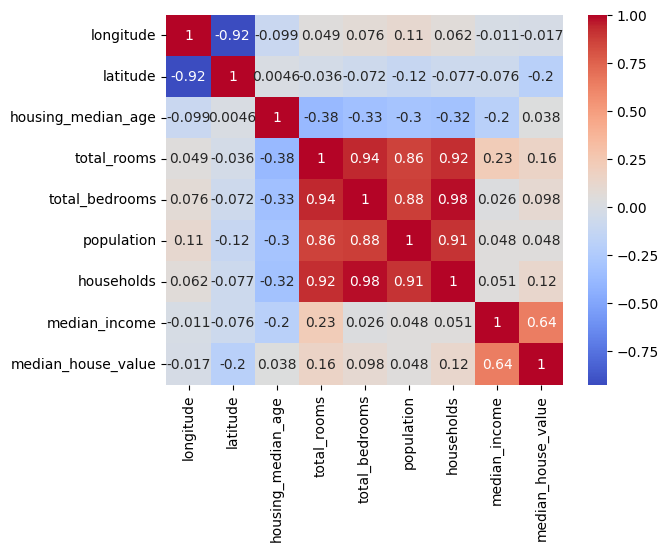

In [450]:
data_without_objects = training_data.select_dtypes(exclude=['object'])
sns.heatmap(data_without_objects.corr(), annot=True, cmap="coolwarm")

In [451]:
# Make a Gaussian distribution.
training_data["total_rooms"] = np.log(training_data["total_rooms"] + 1)
training_data["total_bedrooms"] = np.log(training_data["total_bedrooms"] + 1)
training_data["population"] = np.log(training_data["population"] + 1)
training_data["households"] = np.log(training_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

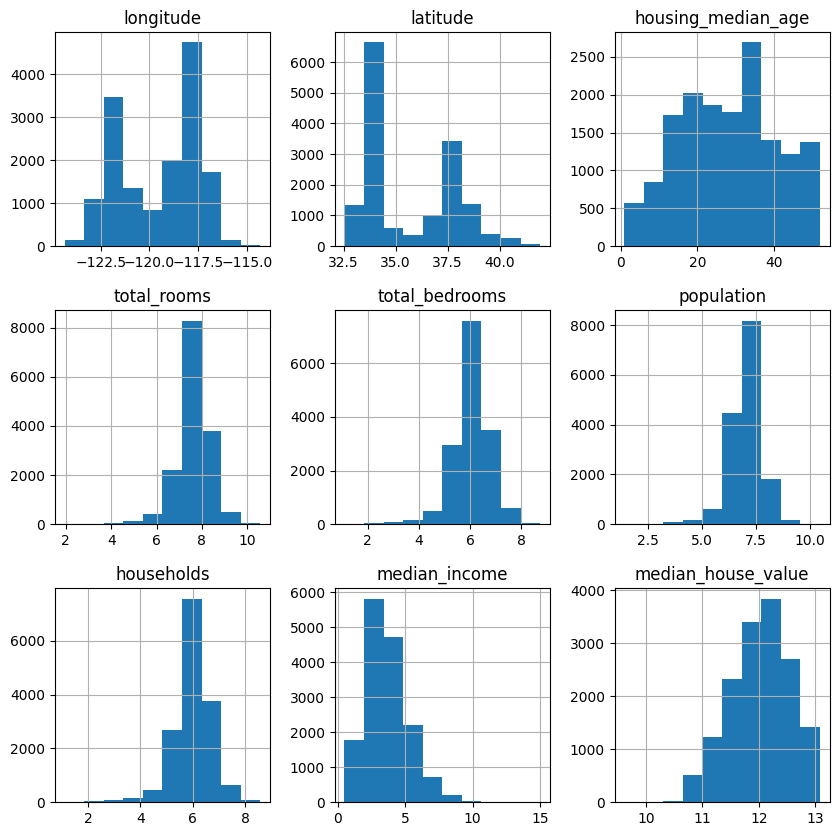

In [452]:
training_data.hist(figsize=(10,10))

In [453]:
dummy = pd.get_dummies(training_data.ocean_proximity, dtype=int)

In [454]:
training_data = training_data.join(dummy).drop(["ocean_proximity"], axis=1)

In [455]:
training_data.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20184,-119.16,34.28,11.00,8.58,6.96,7.94,6.94,4.76,12.36,0,0,0,0,1
14230,-117.04,32.69,9.00,8.14,6.76,7.83,6.72,3.02,11.98,0,0,0,0,1
20327,-119.06,34.24,21.00,8.91,6.89,8.00,6.90,7.68,12.88,1,0,0,0,0


In [456]:
training_data["bedroom_per_room"] = training_data["total_bedrooms"] / training_data["total_rooms"]
training_data["population_per_household"] = training_data["population"] / training_data["households"]

<Axes: >

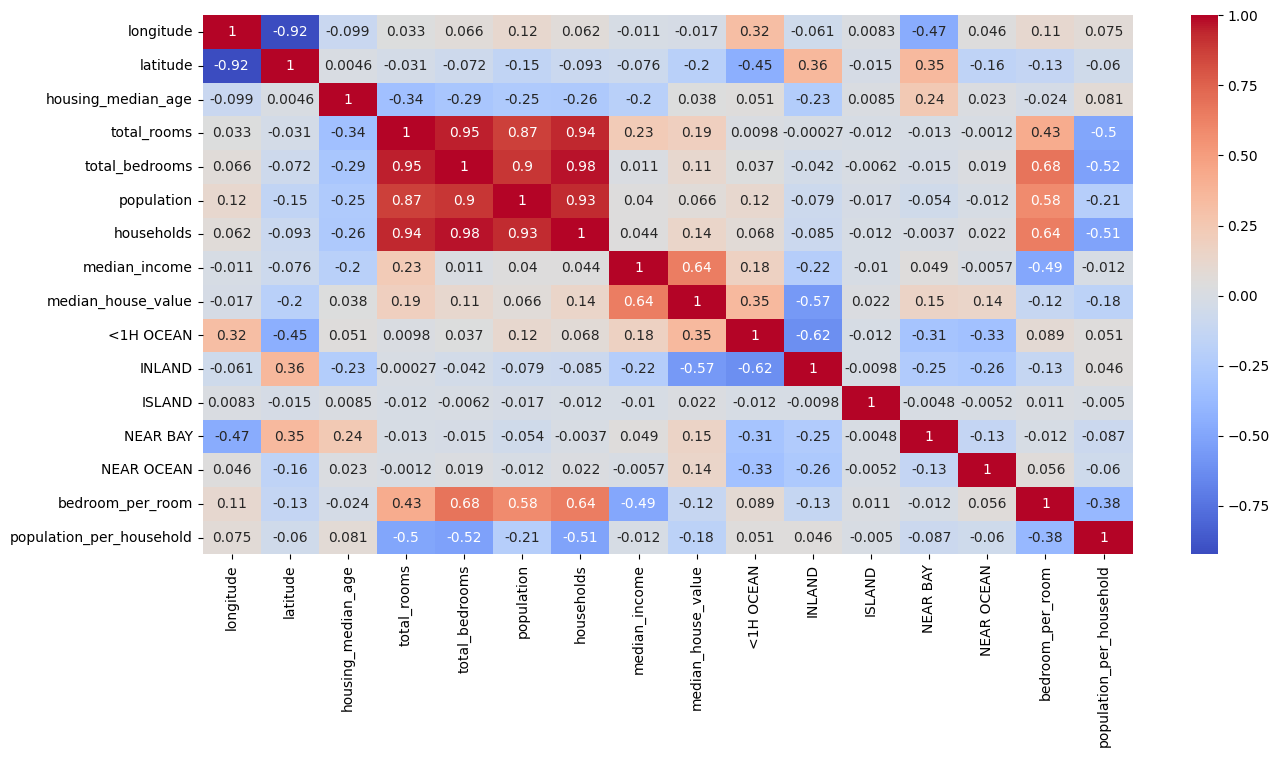

In [457]:
plt.figure(figsize=(15, 7))
sns.heatmap(training_data.corr(), annot=True, cmap="coolwarm")

In [458]:
lr = LinearRegression()

In [459]:
x_train = training_data.drop(["median_house_value"], axis=1)
y_train = training_data["median_house_value"]

In [460]:
lr.fit(x_train, y_train)

LinearRegression()

In [461]:
testing_data = x_test.join(y_test)

In [462]:
def preprocess(data):
  data["total_rooms"] = np.log(data["total_rooms"] + 1)
  data["total_bedrooms"] = np.log(data["total_bedrooms"] + 1)
  data["population"] = np.log(data["population"] + 1)
  data["households"] = np.log(data["households"] + 1)

  dummy = pd.get_dummies(data.ocean_proximity, dtype=int)
  data = data.join(dummy).drop(["ocean_proximity"], axis=1)

  data["bedroom_per_room"] = data["total_bedrooms"] / data["total_rooms"]
  data["population_per_household"] = data["population"] / data["households"]

  return data

In [463]:
testing_data = preprocess(testing_data)

In [464]:
x_test = testing_data.drop(["median_house_value"], axis=1)
y_test = testing_data["median_house_value"]

In [465]:
testing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_per_room,population_per_household
11227,-117.94,33.80,28.00,7.98,6.19,7.31,6.21,4.94,12.45,1,0,0,0,0,0.78,1.18
3246,-119.74,36.15,21.00,7.35,5.73,7.04,5.73,2.47,11.02,0,1,0,0,0,0.78,1.23
16333,-121.33,38.03,19.00,7.44,5.68,6.81,5.67,4.92,11.78,0,1,0,0,0,0.76,1.20
10439,-117.60,33.45,4.00,7.77,6.34,6.90,6.08,5.40,12.40,0,0,0,0,1,0.82,1.14
4239,-118.32,34.11,42.00,7.81,6.30,6.75,6.18,4.08,12.98,1,0,0,0,0,0.81,1.09


In [466]:
y_pred = lr.predict(x_test)

In [467]:
lr.score(x_test, y_test)

0.6817361476050299

In [471]:
mean_squared_error(y_test, y_pred, squared=False)

0.2981725642499702